Service quality factor is one of the determinants of someone buying goods in commerce or no.

Things that can be done to improve the quality of customer satisfaction are friendly and polite communication, fast response to consumers, and on-time delivery.

Good seller service in sending goods and on time according to the specified delivery estimate can increase customer satisfaction in shopping.

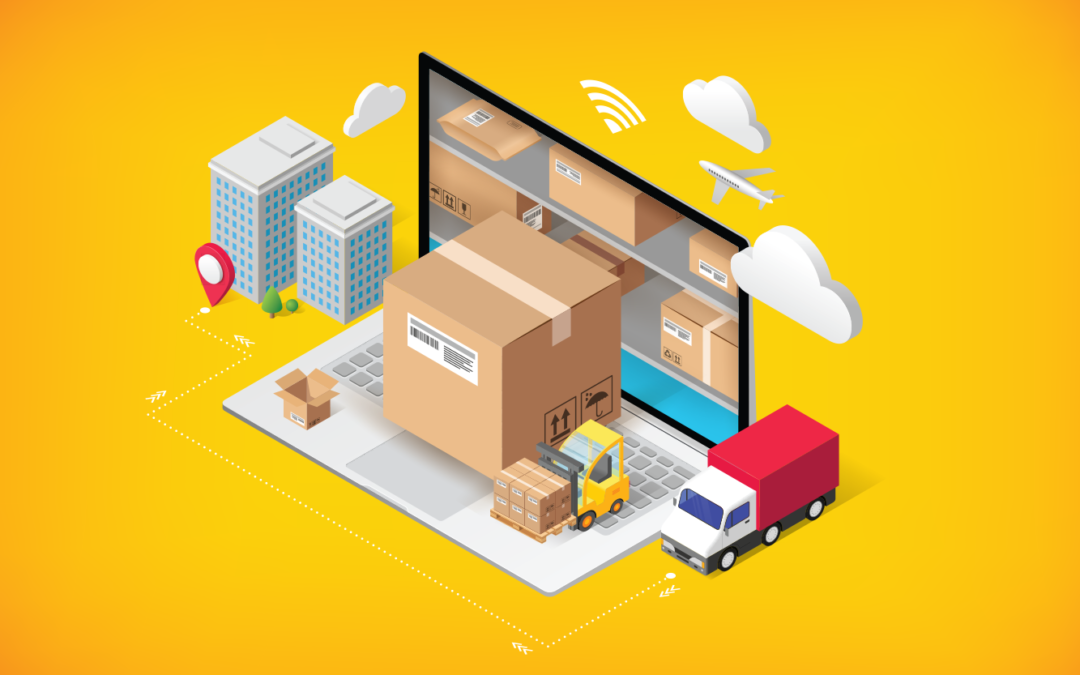

In this notebook i will do some explorations and prediction based on the data we have. This is the data of Product Shipment Tracking. I want to discover key insights from their customer database. I want to use some of the most advanced machine learning techniques to study their customers.

There are two main questions to ask when we work on this dataset:

1. What was Customer Rating? And What criteria that the product will be delivered on time?

2. If Product importance is high. having higest rating or being delivered on time?

Importing Library dan dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"Train.csv")
df


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


The dataset used for model building contained 10999 observations of 12 variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


The data contains the following information:

    1. ID: ID Number of Customers.
    2. Warehouse block: The Company have big Warehouse which is divided in   to block such as A,B,C,D,E.
    3. Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
    4. Customer care calls: The number of calls made from enquiry for       enquiry of the shipment.
    5. Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
    6. Cost of the product: Cost of the Product in US Dollars.
    7. Prior purchases: The Number of Prior Purchase.
    8. Product importance: The company has categorized the product in the    various parameter such as low, medium, high.
    9. Gender: Male and Female.
    10. Discount offered: Discount offered on that specific product.
    11. Weight in gms: It is the weight in grams.
    12. Reached on time: It is the target variable, where 1 Indicate that     the product has NOT reached on time and 0 indicates it has reached on    time.

# Data Cleaning

1. Missing Value Handling

In [5]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

There is no missing value in our data

2. Additional Feature

I will add another discount feature (in percentage rather than in price)

In [6]:
df['Discount_offered_%']=100*df['Discount_offered']/df['Cost_of_the_Product']

In [7]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,24.858757
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,27.314815
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,26.229508
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,5.681818
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,25.000000


3. Label Encoding (For EDA)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
df_num=df.select_dtypes(['int','float'])
df_num

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
0,1,4,2,177,3,44,1233,1,24.858757
1,2,4,5,216,2,59,3088,1,27.314815
2,3,2,2,183,4,48,3374,1,26.229508
3,4,3,3,176,4,10,1177,1,5.681818
4,5,2,2,184,3,46,2484,1,25.000000
...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,1538,1,0.396825
10995,10996,4,1,232,5,6,1247,0,2.586207
10996,10997,5,4,242,5,4,1155,0,1.652893
10997,10998,5,2,223,6,2,1210,0,0.896861


In [10]:
df_cat=df.select_dtypes(['object'])
df_cat

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
...,...,...,...,...
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F
10997,F,Ship,medium,M


In [11]:
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])   #  convert the cat to label encoder
df_cat

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,3,0,1,0
1,4,0,1,1
2,0,0,1,1
3,1,0,2,1
4,2,0,2,0
...,...,...,...,...
10994,0,2,2,0
10995,1,2,2,0
10996,2,2,1,0
10997,4,2,2,1


0 to 1 in minmax scaler and -1 to 1 in standard scaler

In [14]:
df_num

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
0,1,4,2,177,3,44,1233,1,24.858757
1,2,4,5,216,2,59,3088,1,27.314815
2,3,2,2,183,4,48,3374,1,26.229508
3,4,3,3,176,4,10,1177,1,5.681818
4,5,2,2,184,3,46,2484,1,25.000000
...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,1538,1,0.396825
10995,10996,4,1,232,5,6,1247,0,2.586207
10996,10997,5,4,242,5,4,1155,0,1.652893
10997,10998,5,2,223,6,2,1210,0,0.896861


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns you want to scale (you can specify column names or column indices)
columns_to_scale = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered',
                    'Weight_in_gms','Reached.on.Time_Y.N','Discount_offered_%']
   
# Fit and transform the selected columns
df_num_scaled = df_num.copy()  # Create a copy of the original DataFrame
df_num_scaled[columns_to_scale] = scaler.fit_transform(df_num_scaled[columns_to_scale])

# Now, df_num_scaled contains the scaled values for the specified columns,
# while the other columns remain unchanged.

In [16]:
df_num_scaled 

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
0,1,0.4,0.25,0.378505,0.125,0.671875,0.033893,1.0,0.387533
1,2,0.4,1.00,0.560748,0.000,0.906250,0.304894,1.0,0.426325
2,3,0.0,0.25,0.406542,0.250,0.734375,0.346676,1.0,0.409183
3,4,0.2,0.50,0.373832,0.250,0.140625,0.025712,1.0,0.084646
4,5,0.0,0.25,0.411215,0.125,0.703125,0.216654,1.0,0.389764
...,...,...,...,...,...,...,...,...,...
10994,10995,0.4,0.00,0.728972,0.375,0.000000,0.078451,1.0,0.001173
10995,10996,0.4,0.00,0.635514,0.375,0.078125,0.035939,0.0,0.035753
10996,10997,0.6,0.75,0.682243,0.375,0.046875,0.022498,0.0,0.021011
10997,10998,0.6,0.25,0.593458,0.500,0.015625,0.030533,0.0,0.009070


In [17]:
df_scaled=pd.DataFrame(data=df_num_scaled,columns=df_num.columns)
print(df_scaled)

          ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0          1                  0.4             0.25             0.378505   
1          2                  0.4             1.00             0.560748   
2          3                  0.0             0.25             0.406542   
3          4                  0.2             0.50             0.373832   
4          5                  0.0             0.25             0.411215   
...      ...                  ...              ...                  ...   
10994  10995                  0.4             0.00             0.728972   
10995  10996                  0.4             0.00             0.635514   
10996  10997                  0.6             0.75             0.682243   
10997  10998                  0.6             0.25             0.593458   
10998  10999                  0.0             1.00             0.275701   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0                0.

# Concatenation of Categorical and Numerical columns

In [18]:
df_new=pd.concat([df_cat,df_scaled],axis=1)
df_new

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
0,3,0,1,0,1,0.4,0.25,0.378505,0.125,0.671875,0.033893,1.0,0.387533
1,4,0,1,1,2,0.4,1.00,0.560748,0.000,0.906250,0.304894,1.0,0.426325
2,0,0,1,1,3,0.0,0.25,0.406542,0.250,0.734375,0.346676,1.0,0.409183
3,1,0,2,1,4,0.2,0.50,0.373832,0.250,0.140625,0.025712,1.0,0.084646
4,2,0,2,0,5,0.0,0.25,0.411215,0.125,0.703125,0.216654,1.0,0.389764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,2,0,10995,0.4,0.00,0.728972,0.375,0.000000,0.078451,1.0,0.001173
10995,1,2,2,0,10996,0.4,0.00,0.635514,0.375,0.078125,0.035939,0.0,0.035753
10996,2,2,1,0,10997,0.6,0.75,0.682243,0.375,0.046875,0.022498,0.0,0.021011
10997,4,2,2,1,10998,0.6,0.25,0.593458,0.500,0.015625,0.030533,0.0,0.009070


# C. Exploratory Data Analysis

1. Statistics Descriptive

In [19]:
def summary(df,column):
    print("Distinct : ",len(pd.unique(df[column])))
    print("Missing : ",df[column].isnull().sum())
    print("Sum : ",df[column].sum())
    print("Mode : ",st.mode(df[column]))
    print("stddev : ",np.std(df[column]))
    print("CV :",100*(np.std(df[column]))/(np.mean(df[column]))) #coefficient of variation
    print("Min : ",df[column].min())
    print("Max : ",df[column].max())
    print("Mean : ",df[column].mean())
    print("Q1 : ",np.quantile(df[column],0.25))
    print("Q1 : ",np.quantile(df[column],0.5))
    print("Q1 : ",np.quantile(df[column],0.75))
    
    
def values(df,column):
    for i in df[column].unique():
        print(i)


def values_df(df):
    for i in df.columns:
        print(i)
        for j in df[i].unique():
            print(j)
        print("-"*20)
        
def proportion(df,column):
    for i in df[column].unique():
        counts = (sum(df[column]==i)/df[column].count()) *100
        print (i,' dengan proporsi {}%'.format(counts))

Let's see a brief statistical description of the data

In [20]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691,7.023666
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584,9.268773
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.322581
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000,1.754386
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000,3.333333
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000,6.296459
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000,63.636364


 Or it can be seen from the encoded data:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  int64  
 12  Discount_offered_%   10999 non-null  float64
dtypes: float64(1), int64(8), object(4)
memory usage: 1.1+ MB


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  int32  
 1   Mode_of_Shipment     10999 non-null  int32  
 2   Product_importance   10999 non-null  int32  
 3   Gender               10999 non-null  int32  
 4   ID                   10999 non-null  int64  
 5   Customer_care_calls  10999 non-null  float64
 6   Customer_rating      10999 non-null  float64
 7   Cost_of_the_Product  10999 non-null  float64
 8   Prior_purchases      10999 non-null  float64
 9   Discount_offered     10999 non-null  float64
 10  Weight_in_gms        10999 non-null  float64
 11  Reached.on.Time_Y.N  10999 non-null  float64
 12  Discount_offered_%   10999 non-null  float64
dtypes: float64(8), int32(4), int64(1)
memory usage: 945.4 KB


2. Imbalanced Dataset Checking (Checking Target Class Proportion)

We see our target value distribution

In [23]:
proportion(df_new,'Reached.on.Time_Y.N')

1.0  dengan proporsi 59.66906082371125%
0.0  dengan proporsi 40.33093917628875%


# D. Data Visualization

1. Correlation Between Features In Data

Let's see the heatmap correlation in the initial data

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

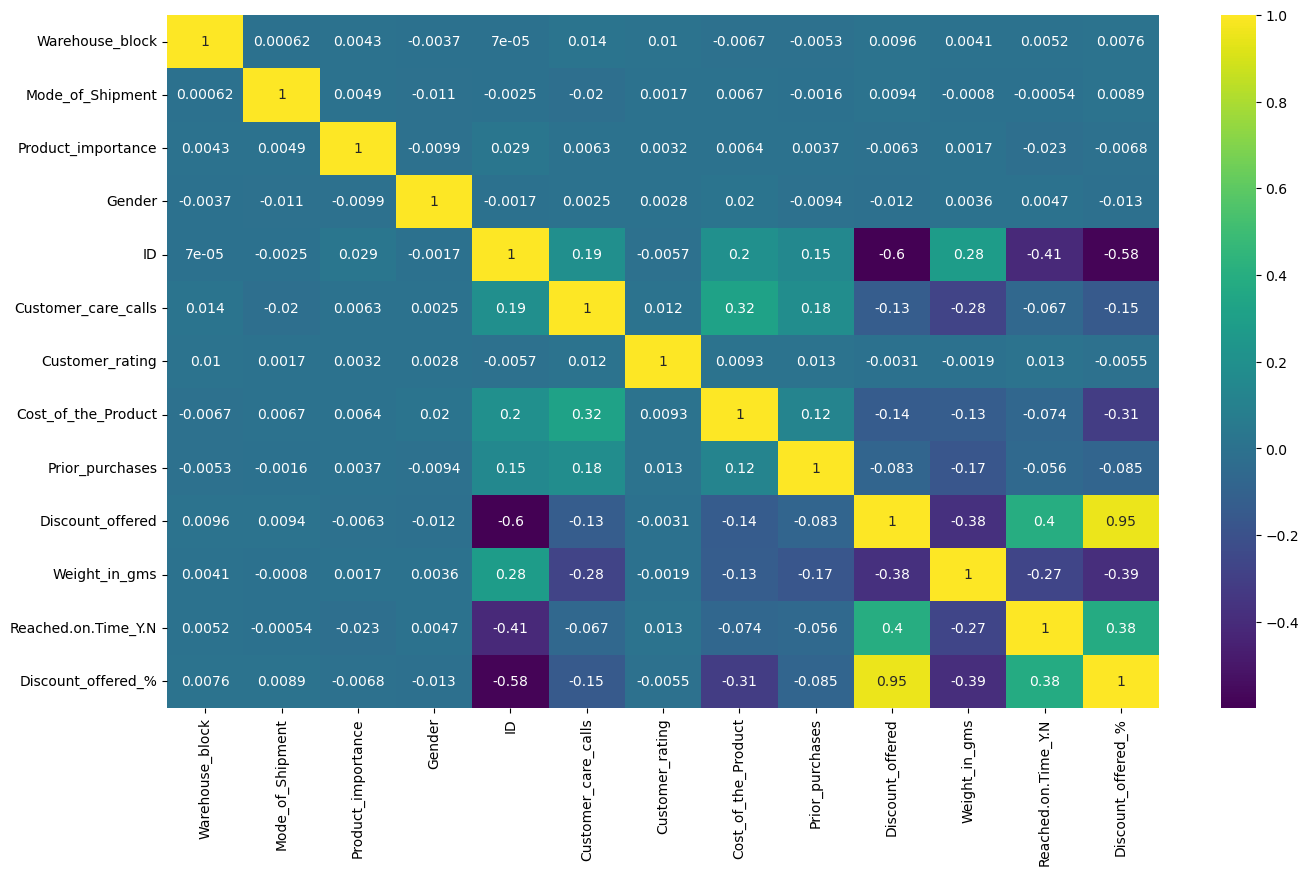

In [25]:
plt.figure(figsize=(16,9))
x = df_new.drop(['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'],axis = 1)
ax = sns.heatmap(df_new.corr(),annot = True,cmap = 'viridis')
plt.show()

Now let's try also on the data that has been encoded

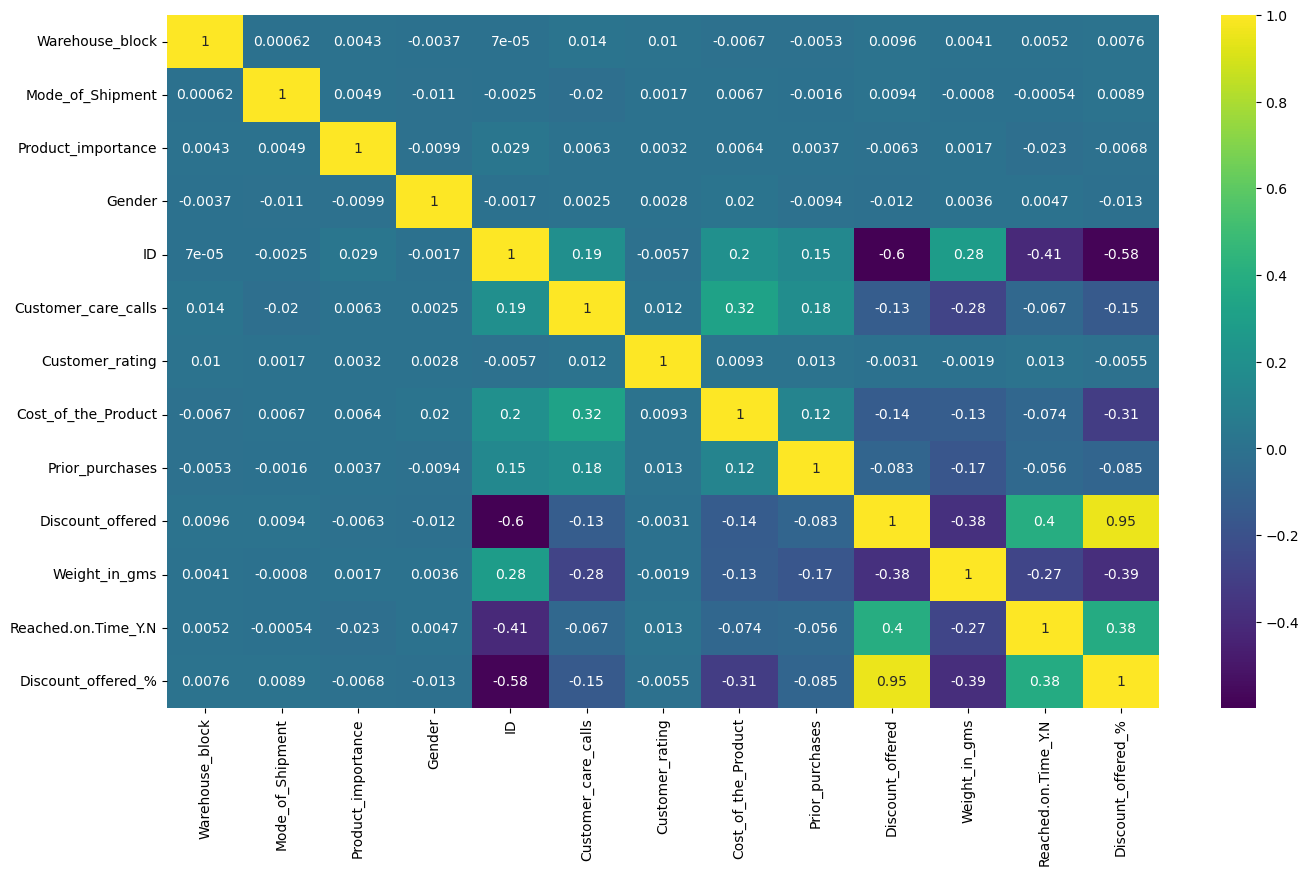

In [26]:
plt.figure(figsize=(16,9))
x = df_new
ax = sns.heatmap(df_new.corr(),annot = True,cmap = 'viridis')
plt.show()

It can be seen that each feature in the data does not have a significant correlation in our target column, namely "Reached.on.Time_YN"


The discount_offered feature has the largest correlation, which is 0.4 in the "Reached.on.Time_YN" feature, but this value does not show a strong enough correlation between the two features.


There is no high correlation between features other than our additional feature (discount_offered in percentage). I will remove it later so we can avoid multicollinearity problem.

2. Basic Visualization

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  int64  
 12  Discount_offered_%   10999 non-null  float64
dtypes: float64(1), int64(8), object(4)
memory usage: 1.1+ MB


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  int32  
 1   Mode_of_Shipment     10999 non-null  int32  
 2   Product_importance   10999 non-null  int32  
 3   Gender               10999 non-null  int32  
 4   ID                   10999 non-null  int64  
 5   Customer_care_calls  10999 non-null  float64
 6   Customer_rating      10999 non-null  float64
 7   Cost_of_the_Product  10999 non-null  float64
 8   Prior_purchases      10999 non-null  float64
 9   Discount_offered     10999 non-null  float64
 10  Weight_in_gms        10999 non-null  float64
 11  Reached.on.Time_Y.N  10999 non-null  float64
 12  Discount_offered_%   10999 non-null  float64
dtypes: float64(8), int32(4), int64(1)
memory usage: 945.4 KB


2.1. Warehouse_block Feature

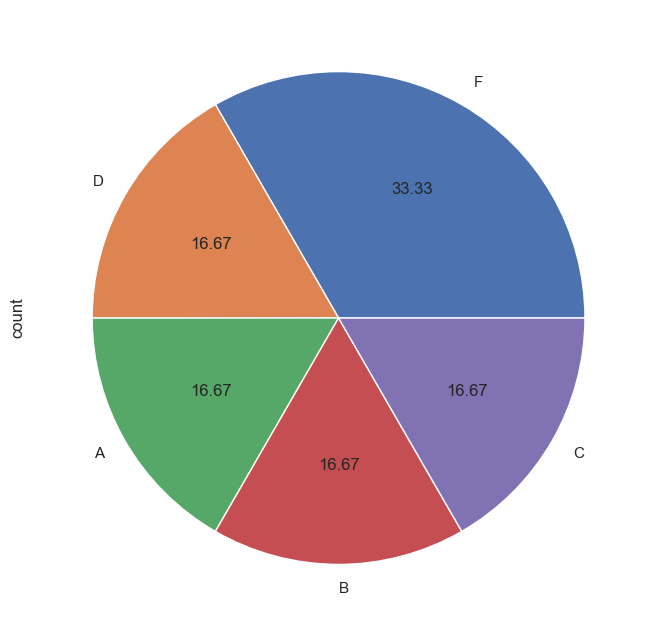

In [29]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Warehouse_block'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

It can be seen that warehouse block F dominates our data

<Figure size 2000x800 with 0 Axes>

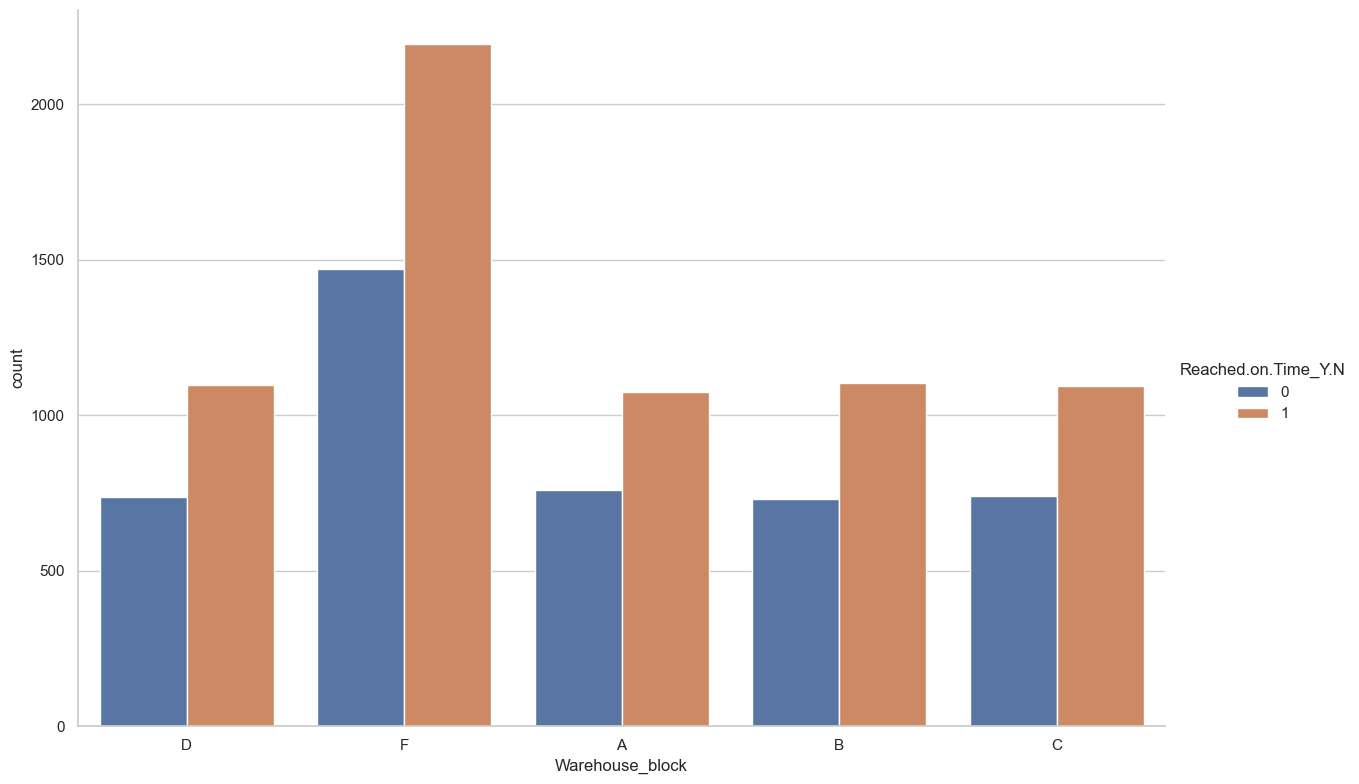

In [30]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Warehouse_block',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

We can see from above that products that have been delivered to warehouse block F are not reached on time the most.

2.2. Mode_of_Shipment Feature

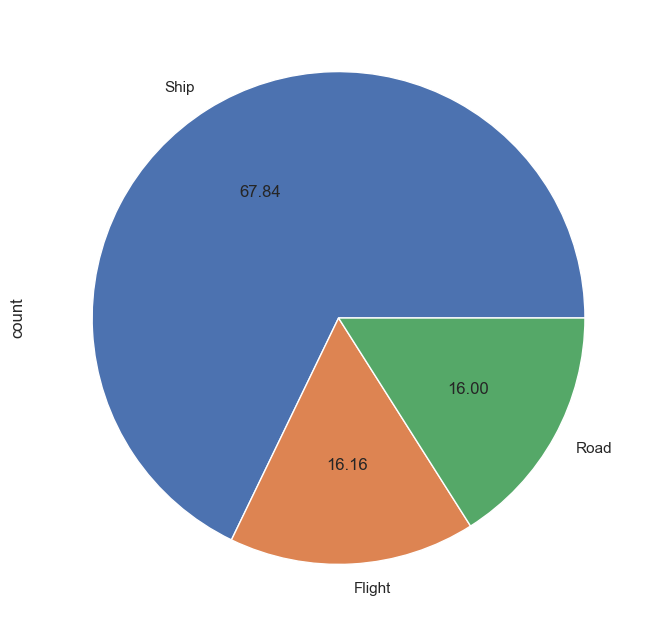

In [31]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Mode_of_Shipment'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

We can see the number of products sent by ship is more than products sent by other modes of transportation

<Figure size 2000x800 with 0 Axes>

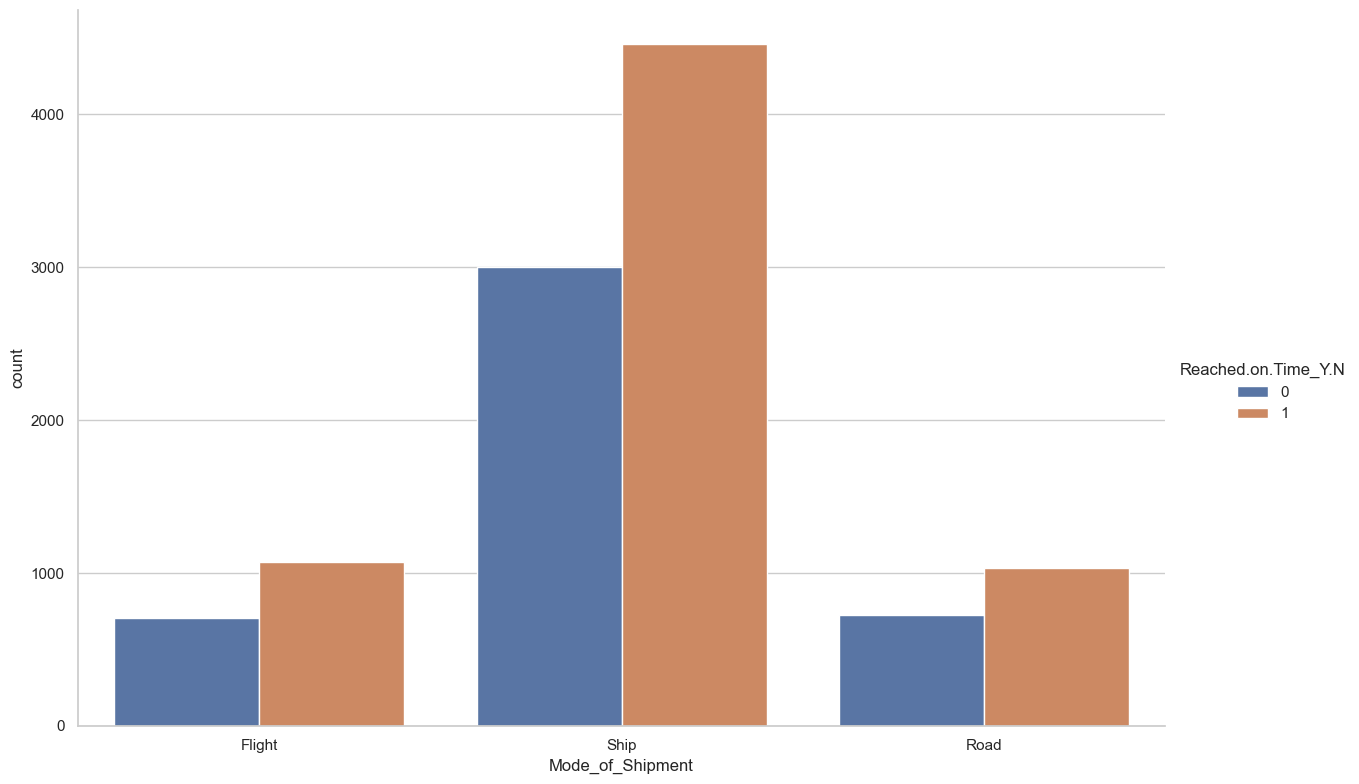

In [32]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

And of course the delivery of products using ships are more late to arrive to customers.


2.3. Customer_care_calls Feature

<Figure size 2000x800 with 0 Axes>

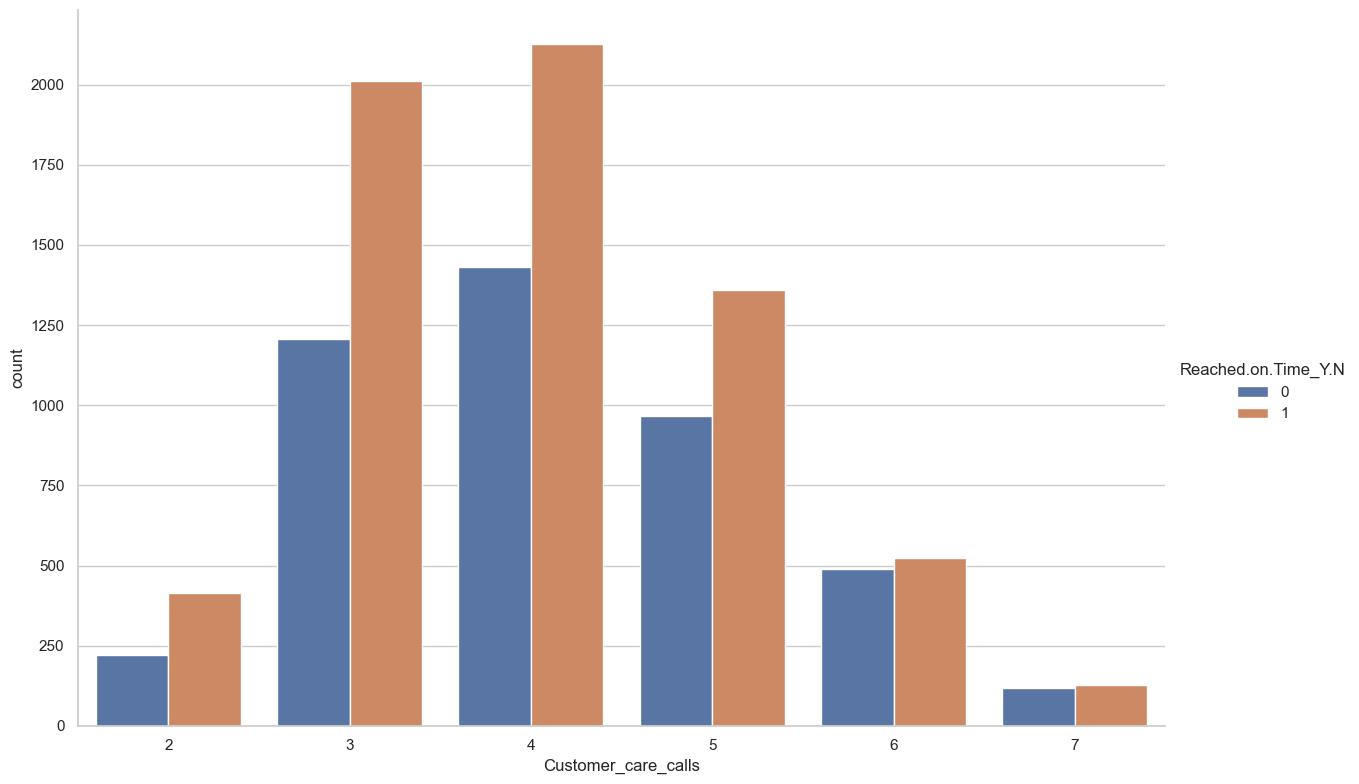

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Customer_care_calls',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

We can see the number of customer care calls are dominated by 4 calls and from those 4 calls, the products related dominated the number of products which didn't reach on time.


2.4. Customer_rating Feature

<Figure size 2000x800 with 0 Axes>

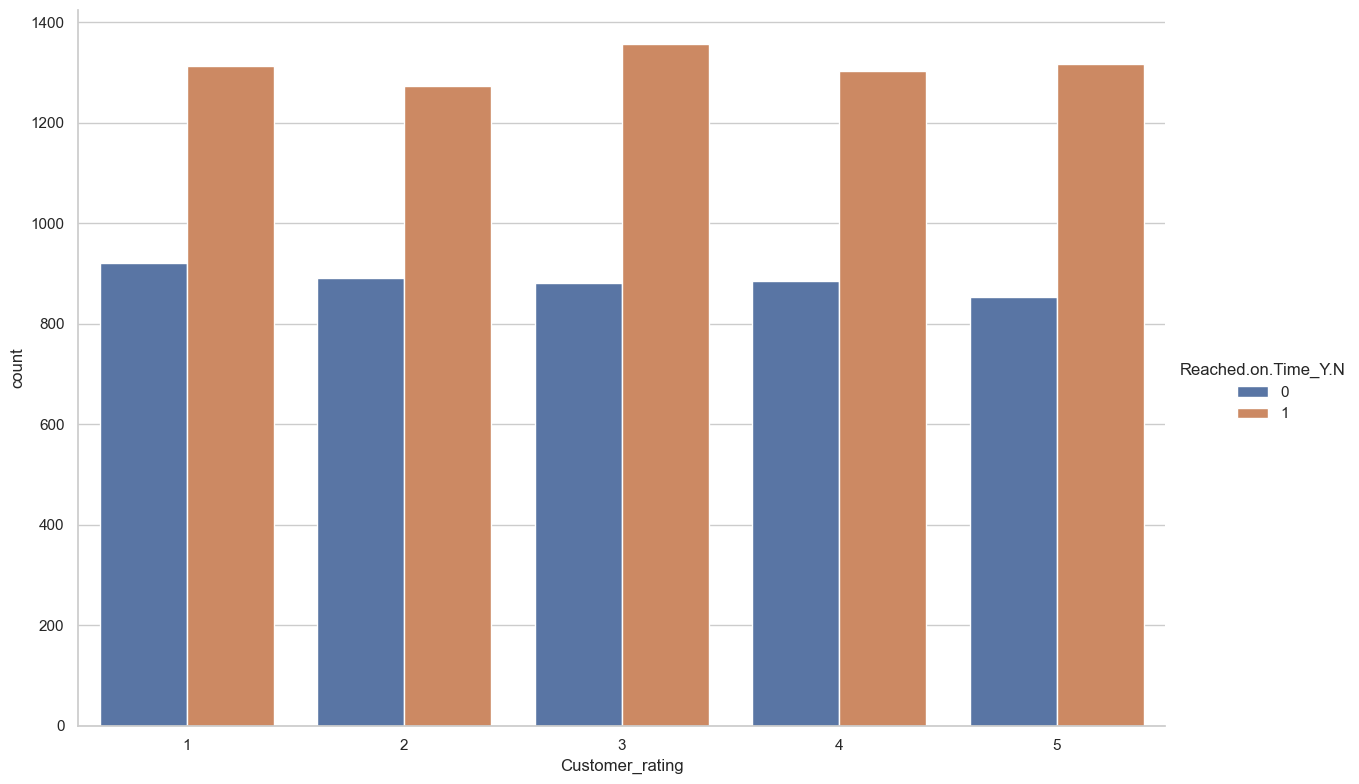

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Customer_rating',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

Almost all ratings are equal in number.


2.5. Cost_of_the_Product Feature

<Axes: xlabel='Cost_of_the_Product', ylabel='Count'>

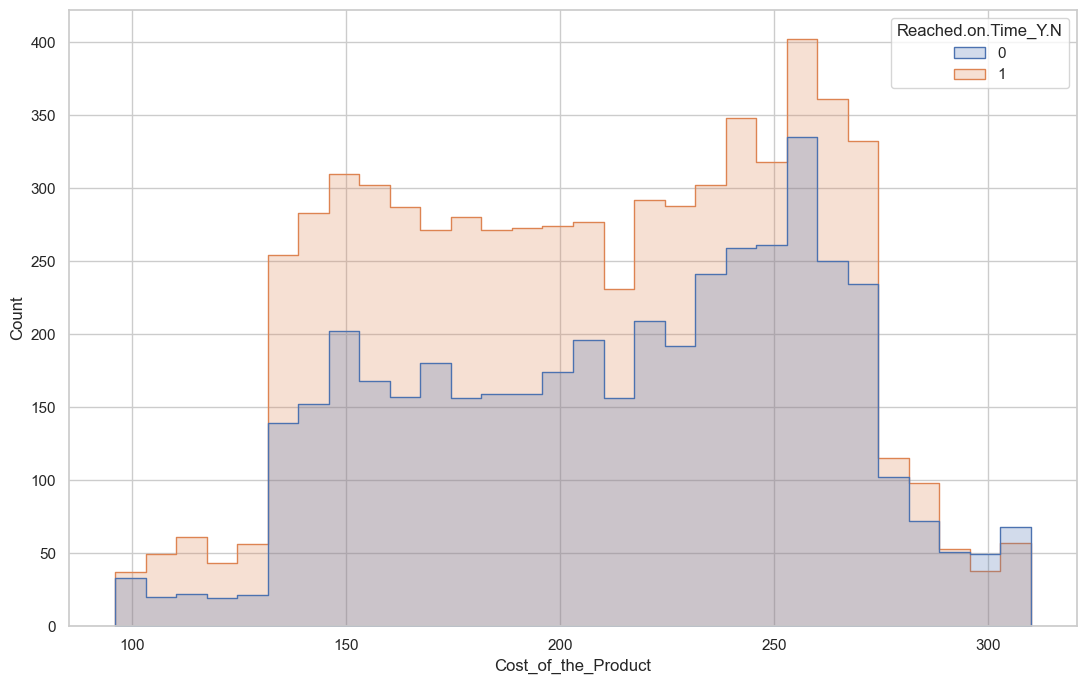

In [35]:
sns.histplot(data=df, x="Cost_of_the_Product",hue="Reached.on.Time_Y.N",element="step")

From histogram above we can see that products with a price of around 250-280 dollars tend to arrive late

2.6. Prior_purchases Feature

<Figure size 2000x800 with 0 Axes>

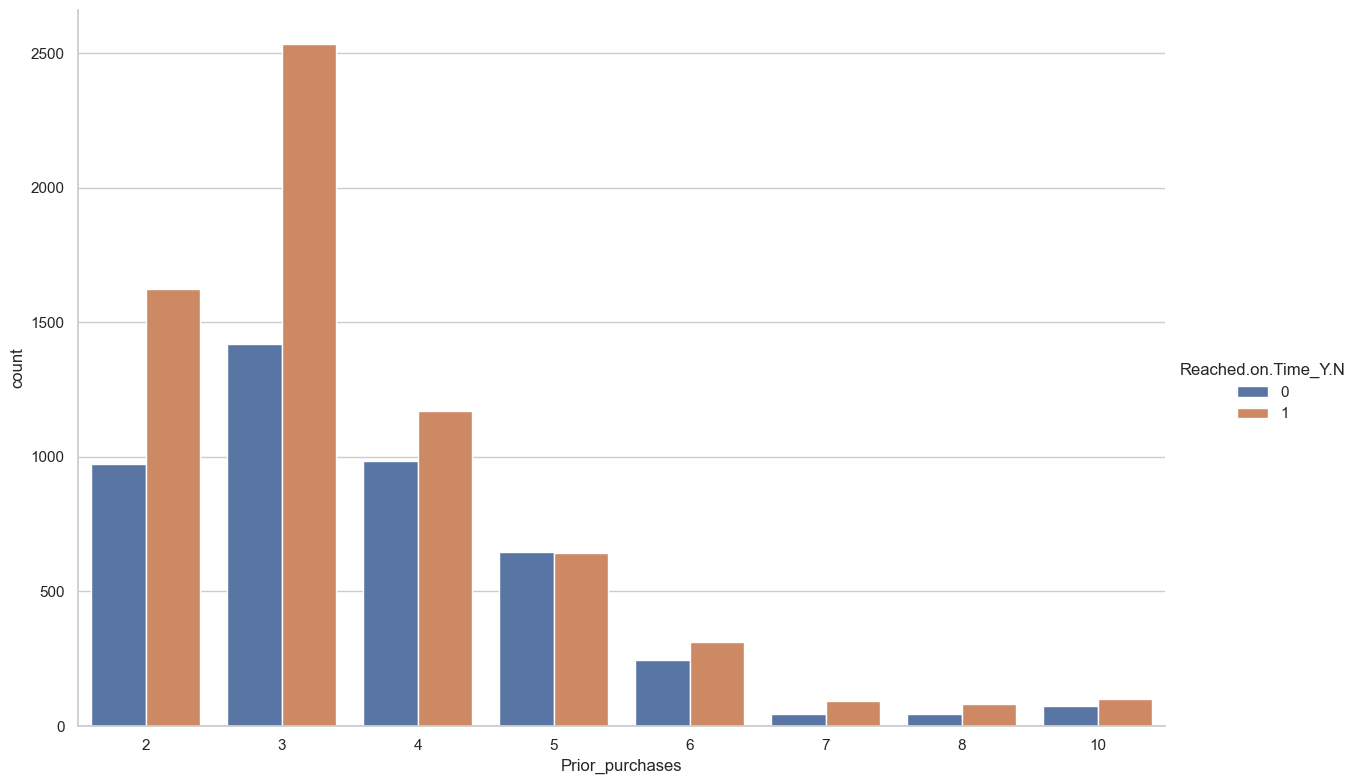

In [37]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Prior_purchases',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

Our data is dominated by data with 3 prior purchases. Customer with 3 prior purchases product also tends to arrive late.

2.7. Product_importance Feature

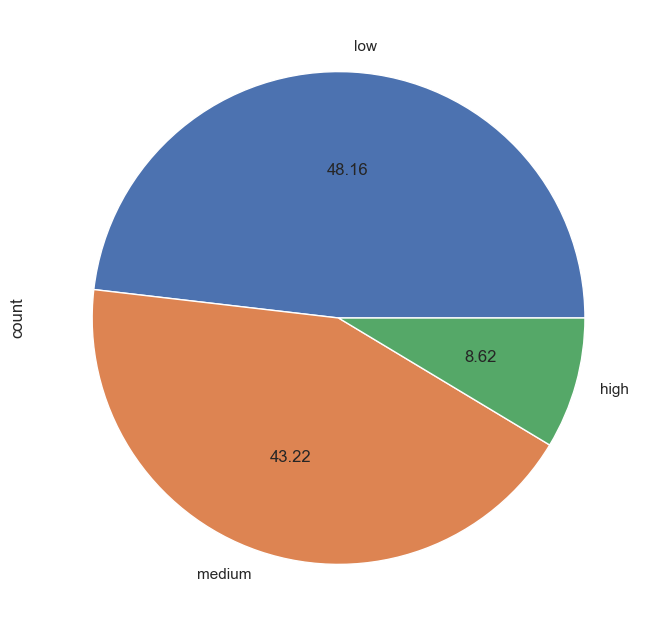

In [38]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Product_importance'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

As usual our data is dominated by products with low importance level. Data of products with high importance level is the least.

<Figure size 2000x800 with 0 Axes>

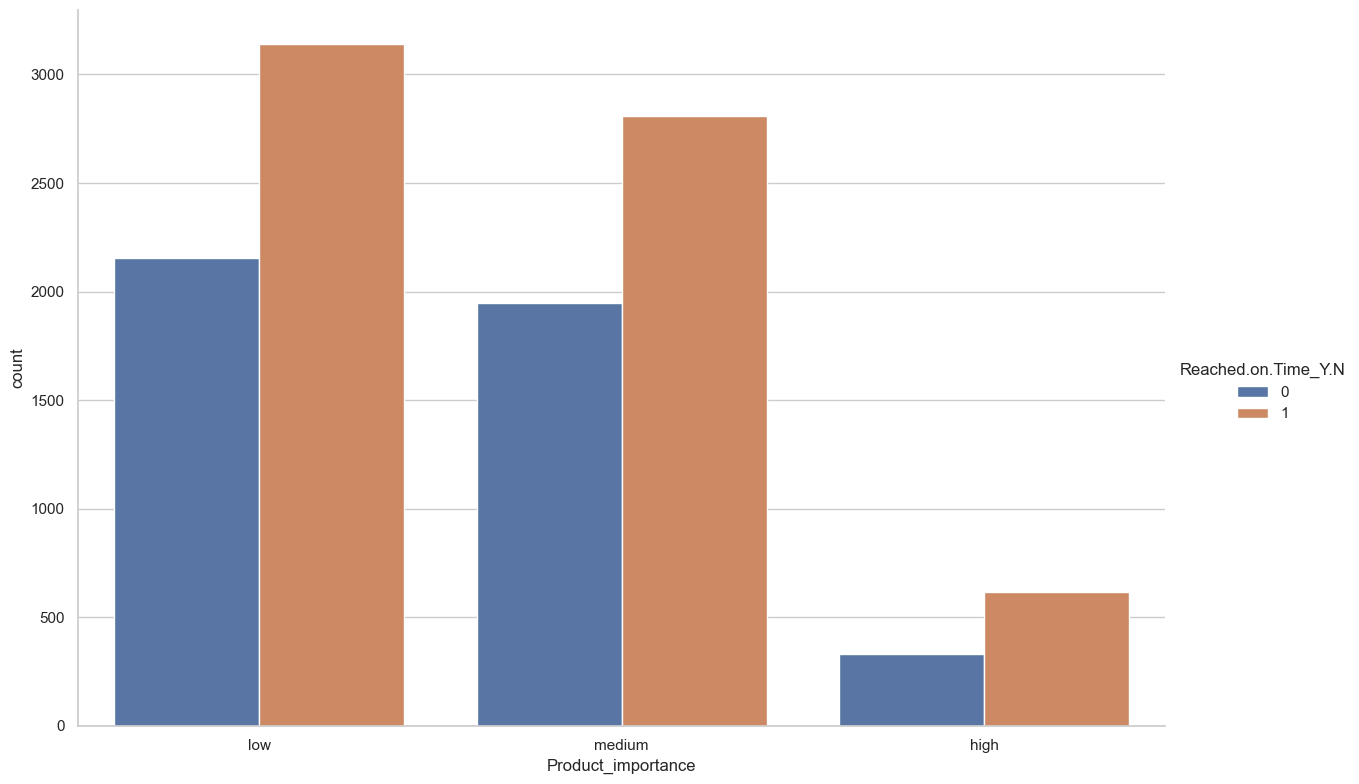

In [39]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Product_importance',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

And of course products with low level of importance tend to arrive late to customer.




2.8. Gender Feature

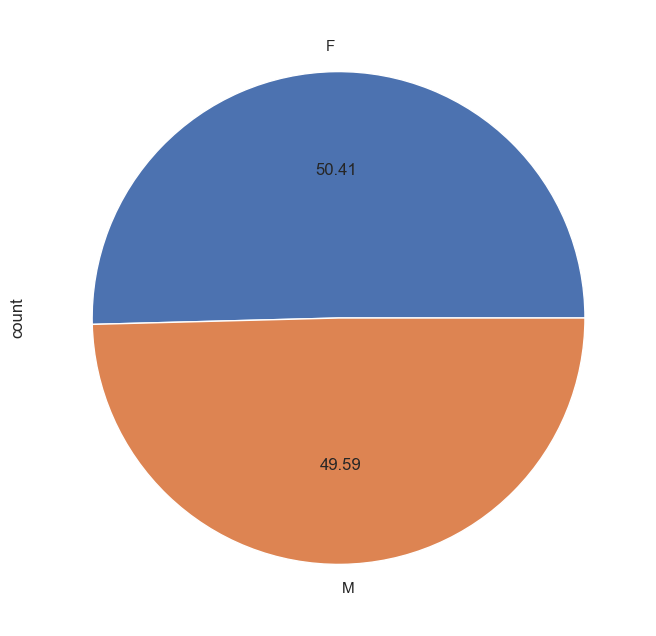

In [40]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

Our data is almost equal in gender context. Male and female are equal in our data.

<Figure size 2000x800 with 0 Axes>

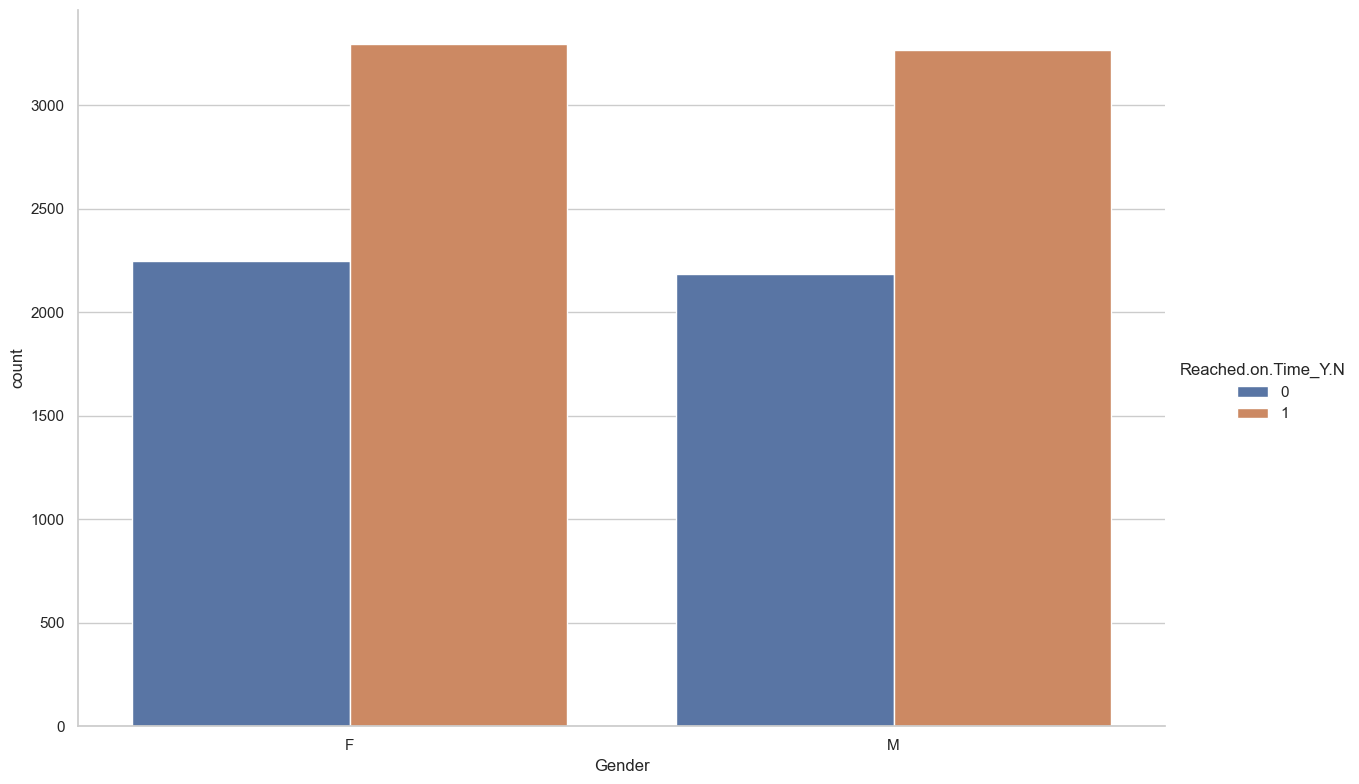

In [41]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Gender',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

And also both genders' products tend to reached or arrived in customers' houses late.

2.11. Reached on Time Feature


We want to check how our target data is distributed

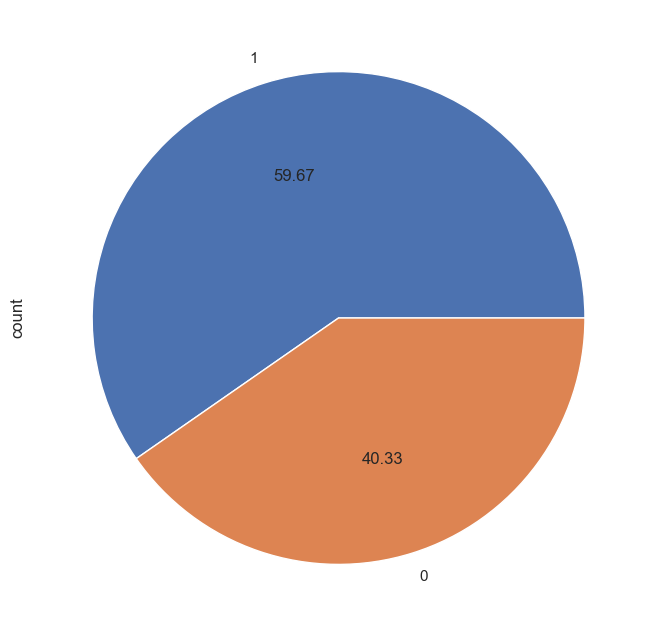

In [42]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
df['Reached.on.Time_Y.N'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()


3.4. Distribution of data from each target class related to customer features (Customer care calls and Customer rating) and price features (Product cost and discount) shown in boxplots

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered_%'>

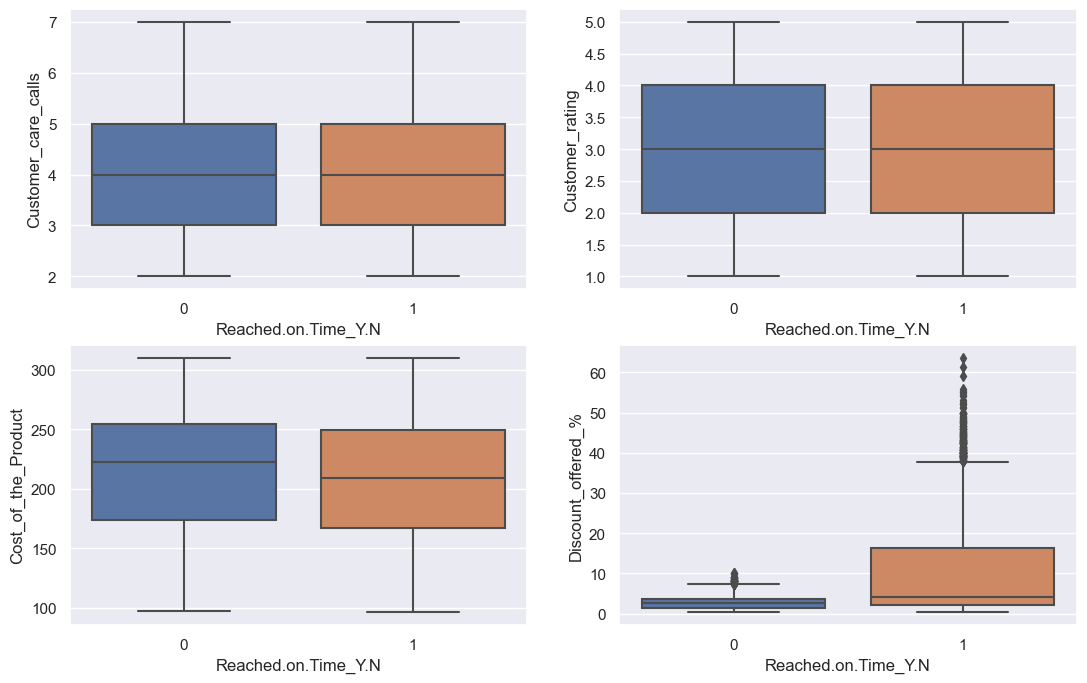

In [43]:
sns.set()

#define plotting region (2 rows, 2 columns)

fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=df, x='Reached.on.Time_Y.N', y='Customer_care_calls', ax=axes[0,0])
sns.boxplot(data=df, x='Reached.on.Time_Y.N', y='Customer_rating', ax=axes[0,1])
sns.boxplot(data=df, x='Reached.on.Time_Y.N', y='Cost_of_the_Product', ax=axes[1,0])
sns.boxplot(data=df, x='Reached.on.Time_Y.N', y='Discount_offered_%', ax=axes[1,1])

Data Preprocessing

1. Removing Unnecessary Feature

In [44]:
df_new=df_new.drop(["ID"],axis=1)

In [45]:
df_new.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
0,3,0,1,0,0.4,0.25,0.378505,0.125,0.671875,0.033893,1.0,0.387533
1,4,0,1,1,0.4,1.00,0.560748,0.000,0.906250,0.304894,1.0,0.426325
2,0,0,1,1,0.0,0.25,0.406542,0.250,0.734375,0.346676,1.0,0.409183
3,1,0,2,1,0.2,0.50,0.373832,0.250,0.140625,0.025712,1.0,0.084646
4,2,0,2,0,0.0,0.25,0.411215,0.125,0.703125,0.216654,1.0,0.389764


2. Checking For Outlier

In [46]:
df_new.describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,1.516865,1.346031,0.495863,0.410892,0.497636,0.533630,0.195950,0.193331,0.384663,0.596691,0.105839
std,1.490726,0.756894,0.631434,0.500006,0.228298,0.353401,0.224595,0.190358,0.253211,0.238916,0.490584,0.146394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.200000,0.250000,0.341121,0.125000,0.046875,0.122498,0.000000,0.022614
50%,3.000000,2.000000,1.000000,0.000000,0.400000,0.500000,0.551402,0.125000,0.093750,0.459898,1.000000,0.047553
75%,4.000000,2.000000,2.000000,1.000000,0.600000,0.750000,0.724299,0.250000,0.140625,0.591527,1.000000,0.094354
max,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the statistical description of the data, the "Weight_in_gms" feature looks a little suspicious, we will check whether there are outliers in these features.

We check for outliers using the Interquartile Range (IQR).¶

In [47]:
Q12 = df_new['Weight_in_gms'].quantile(0.25)
Q32 = df_new['Weight_in_gms'].quantile(0.75)
IQR = Q32-Q12

In [48]:
df_new[df_new['Weight_in_gms']>(Q32+(1.5*IQR))]

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Discount_offered_%


It seems that no outliers are detected in the Weight_in_gms data feature

# feature scaling

We see that our data values have different ranges. We need to do some feature scaling so they have same ranges. We don't want our ML model detects feature that has bigger value range as a dominant feature that impacts more to our target value.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,train_test_split
#from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report, confusion_matrix,f1_score,roc_auc_score

In [50]:
features = df_new.drop('Reached.on.Time_Y.N',axis = 1)
target = df_new['Reached.on.Time_Y.N']


X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,stratify=target)

In [51]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [52]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Modelling


E.1. Basic Models


Here i will try to use basic models first without adding or reducing our data.

k Near Neighbors Model

In [53]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
ypred_knn = knn_model.predict(X_test)
ypred_knn

array([1., 1., 0., ..., 1., 1., 0.])

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

         0.0       0.56      0.62      0.58       887
         1.0       0.72      0.67      0.69      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



Decision Tree

In [56]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
ypred_dt = dt_model.predict(X_test)
ypred_dt

array([0., 1., 0., ..., 0., 1., 0.])

In [58]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57       887
         1.0       0.71      0.70      0.70      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



Logistic Regression

In [59]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train,y_train)

LogisticRegression()

In [60]:
ypred_logreg = model_logreg.predict(X_test)
ypred_logreg

array([0., 1., 0., ..., 0., 1., 0.])

In [61]:
print(classification_report(y_test,ypred_logreg))

              precision    recall  f1-score   support

         0.0       0.55      0.57      0.56       887
         1.0       0.70      0.69      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



Random forest 

In [62]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
ypred_forest = model_forest.predict(X_test)
ypred_forest

array([1., 1., 0., ..., 0., 1., 1.])

In [64]:
print(classification_report(y_test,ypred_forest))

              precision    recall  f1-score   support

         0.0       0.57      0.73      0.64       887
         1.0       0.78      0.63      0.69      1313

    accuracy                           0.67      2200
   macro avg       0.67      0.68      0.67      2200
weighted avg       0.69      0.67      0.67      2200



In [65]:
pip install xgboost

Extreme Gradient Boosting 

In [66]:
#import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
ypred_xgb = model_xgb.predict(X_test)
ypred_xgb

array([1, 1, 0, ..., 0, 1, 0])

In [68]:
print(classification_report(y_test,ypred_xgb))

              precision    recall  f1-score   support

         0.0       0.55      0.64      0.59       887
         1.0       0.73      0.65      0.69      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.65      0.64      2200
weighted avg       0.66      0.65      0.65      2200



# Models using oversampled data

Here i will try using or adding oversampled data.

In [69]:
#pip install imblearn

In [70]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [71]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [72]:
rus=RandomUnderSampler(random_state=1,replacement=True)
x_rus,y_rus=rus.fit_resample(features,target)

In [73]:
features=x_rus
target=y_rus

In [74]:
print("Original Dataset",Counter(target))
print("Resampled Dataset",Counter(y_rus))

Original Dataset Counter({0.0: 4436, 1.0: 4436})
Resampled Dataset Counter({0.0: 4436, 1.0: 4436})


In [75]:
ros=RandomOverSampler(random_state=1)
x_ros,y_ros=ros.fit_resample(features,target)

In [76]:
features=x_rus
target=y_rus

In [77]:
print("Original Dataset",Counter(target))
print("Resampled Dataset",Counter(y_rus))

Original Dataset Counter({0.0: 4436, 1.0: 4436})
Resampled Dataset Counter({0.0: 4436, 1.0: 4436})


Smote Algorithm

In [78]:
from imblearn.over_sampling import SMOTE
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.30,random_state=1)

In [79]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.64      0.87      0.74      1326
         1.0       0.80      0.52      0.63      1336

    accuracy                           0.69      2662
   macro avg       0.72      0.70      0.69      2662
weighted avg       0.72      0.69      0.69      2662



In [80]:
counter=Counter(ytrain)
print("Before",counter)

sm=SMOTE()

xtrain,ytrain=sm.fit_resample(xtrain,ytrain)
xtrain1,ytrain1=sm.fit_resample(xtrain,ytrain)

counter=Counter(ytrain1)
print("after",counter)

Before Counter({0.0: 3110, 1.0: 3100})
after Counter({1.0: 3110, 0.0: 3110})


Logistic Regression Model (Oversampled data)

In [81]:
lr=LogisticRegression()
lr.fit(xtrain1,ytrain1)
ypred=lr.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.64      0.86      0.74      1326
         1.0       0.80      0.53      0.63      1336

    accuracy                           0.69      2662
   macro avg       0.72      0.69      0.69      2662
weighted avg       0.72      0.69      0.69      2662



In [82]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [83]:
ypred_knn = knn_model.predict(X_test)
ypred_knn

array([1., 1., 0., ..., 1., 1., 0.])

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

         0.0       0.56      0.62      0.58       887
         1.0       0.72      0.67      0.69      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



Decision Tree Model (Oversampled data)

In [85]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
ypred_dt = dt_model.predict(X_test)
ypred_dt

array([1., 1., 0., ..., 0., 1., 0.])

In [87]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

         0.0       0.55      0.57      0.56       887
         1.0       0.70      0.69      0.70      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



Random Forest Classifier Model (Oversampled data)

In [88]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)

RandomForestClassifier()

In [89]:
ypred_forest = model_forest.predict(X_test)
ypred_forest

array([1., 1., 0., ..., 0., 1., 0.])

In [90]:
print(classification_report(y_test,ypred_forest))

              precision    recall  f1-score   support

         0.0       0.56      0.72      0.63       887
         1.0       0.77      0.62      0.68      1313

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.66      2200

